## DataQuest Guided Project

## Exploring Popular Data Science Questions

### Navigation

[Introduction](#Introduction)

[Stack Exchange Site Features](#Stack-Exchange-Features)

[Exploring the Database](#Explore-the-database-and-its-tables)

[Analyzing Genre Popularity](#Genre-Popularity)

[Analyzing Sales Agent Performance](#Analyzing-Sales-Agent-Performance)

[Analyzing Purchases by Country](#Purchases-by-Country)

[Analyzing Purchases of Individual Tracks and Full Albums](#Purchases-of-Individual-Tracks-and-Full-Albums)

[Finding the Artist Featured in Most Playlists](#Finding-the-Artist-Featured-in-Most-Playlists)

[Analyzing Tracks Purchased and Not Purchased](#Tracks-Purchased-and-Not-Purchased)

[Analyzing Tracks Available and Sales Popularity](#Comparing-Tracks-Available-and-Sales-Popularity)

[Analyzing the Effect of File Protection on Sales](#Effect-of-File-Protection-on-Sales)

[Conclusion](#Conclusion)

### Introduction

The goal of this project is to figure out the best topic to write about for a company that creates data science content. There is more than one approach to address our goal because there is no single definition of "best". The approach we will take here is to investigate popular topics posted on the [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/).

As of the time of this writing (1-21-21), 67% of questions posted to DSSE were answered according to the [list of Stack Exchange sites](https://stackexchange.com/sites?view=list#percentanswered). The list contains 176 sites (you can get this by viewing the page source in Chrome browser and searching for string `class="site-icon`. My search box found 176 matches, a quick use of the text search feature to web scrape useful information. Other browsers may be capable of showing you the number of matches as well). 

DSSE ranks 13th from the bottom in the list of 176 sites in percentage of questions answered. This may indicate an additional opportunity to write content on topics that were asked about and went unanswered.

### Stack Exchange Features

Before we go deeper, it is important to have a basic understanding of how a Stack Exchange site works. Simply put, any given Stack Exchange site is a question-answer site dedicated to a topic in a variety of categories, such as technology, culture, language, science, recreation, professional, and business. Here are some additional points explaining how a site works:

* Any user can ask a question, and any user can answer
* Questions and answers can receive upvotes and downvotes from users
* The default sorting method for questions is to show new questions or replies at the top
* "Hot" sorting method allows to sort questions by the number of answers, views, and votes instead
* Active and helpful users earn reputation points
* Questions have to be on topic
* Subjective questions are discouraged unless they are constructive, for example they may invite answers that explain "Why" and "How", or the sharing of experiences over opinions
* Questions with a scope that is too broad or with a goal to start a discussion rather than look for an answer are not welcomed
* Duplicate questions are marked as such by site's moderators

DSSE home page has a number of elements besides the questions list:

* search bar with text input
* links to tags, users, unanswered questions, and jobs (not all sites have a job board)
* links to popular questions from other sites
* links to site-specific chat where questions and discussion rules are more relaxed

Tags and unanswered question links may be useful in reaching our goal. We may take a two-prong approach of looking at popular tags with answers, and popular tags with no answers.

Each question page has additional elements besides the question itself:

* upvote / downvote icons
* number of views - this may be useful in reaching our goal
* comments from other users that are tied to the question - usually requests for additional information or clarification
* answers from other users intending to answer the question at hand

We can keep things simple and analyze tags by the following criteria:

* Number of tag appearances
* Number of views

### Stack Exchange Data Explorer (SEDE)

Stack Exchange provides a public-facing database for each site that enables efficient data analysis without having to scrape the sites.

Here is the link to the [Data Science Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new) that accepts Transact-SQL queries. Transact-SQL is a SQL dialect that is different from SQLite.

The database schema is below.

View database schema in full resolution [here](https://i.stack.imgur.com/AyIkW.png)

![Database Schema](https://i.stack.imgur.com/AyIkW.png)

These are some tables that may be useful. "Posts" refer to questions as well as answers, among other actions users can take on the site:

* Posts
* PostTags
* PostTypes
* PostFeedback
* Tags
* VoteTypes

Query to view top 5 most frequently used tags:

<code>
SELECT TOP 5 *
  FROM Tags
 ORDER BY Count DESC;
</code>

|Id|TagName|Count|ExcerptPostId|WikiPostId|
|---|---|---|---|---|
|2|machine-learning|8546|4909|4908|
|46|python|4960|5523|5522|
|81|neural-network|3553|8885|8884|
|194|deep-learning|3544|8956|8955|
|77|classification|2425|4911|4910|

Query to view post types. Question (Id 1) and Answer (Id 2) may be of interest to us:

<code>
SELECT *
  FROM PostTypes;
</code>

|Id|Name|
|---|---|
|1|Question|
|2|Answer|
|3|Wiki|
|4|TagWikiExcerpt|
|5|TagWiki|
|6|ModeratorNomination|
|7|WikiPlaceholder|
|8|PrivilegeWiki|

Query to view vote types. UpMod (Id 2) and DownMod (Id 3) may be of interest to us:

<code>
SELECT *
  FROM VoteTypes;
</code>

|Id|Name|
|---|---|
|1|AcceptedByOriginator|
|2|UpMod|
|3|DownMod|
|4|Offensive|
|5|Favorite|
|6|Close|
|...||

Query to preview votes by post:

<code>
SELECT TOP 5 *
  FROM PostFeedback;
</code>

|Id|PostId|IsAnonymous|VoteTypeId|CreationDate|
|---|---|---|---|---|
|1|135|TRUE|3|6/1/2014  1:10:04 AM|
|2|135|TRUE|3|6/9/2014  9:48:21 PM|
|3|41|TRUE|2|6/9/2014  10:09:54 PM|
|4|242|TRUE|2|6/9/2014  11:57:14 PM|
|5|250|TRUE|2|6/10/2014  6:49:31 AM|

Query to preview post tags:

<code>
SELECT TOP 5 *
  FROM PostTags;
</code>

|PostId|TagId|
|---|---|
|14|1|
|81|1|
|370|1|
|474|1|
|717|1|

Query to preview posts:

<code>
SELECT TOP 5 *
  FROM PostFeedback;
</code>

|Id|PostTypeId|AcceptedAnswerId|ParentId|CreationDate|DeletionDate|Score|ViewCount|Body|OwnerUserId|OwnerDisplayName|LastEditorUserId|LastEditorDisplayName|LastEditDate|LastActivityDate|Title|Tags|AnswerCount|CommentCount|FavoriteCount|ClosedDate|CommunityOwnedDate|ContentLicense|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|48281|2||48269|3/31/2019  12:56:35 AM||2||I think th|26917||67328||3/31/2019  9:40:07 AM|3/31/2019  9:40:07 AM||||1||||CC BY-SA 4.0|
|48282|1|||3/31/2019  2:03:57 AM||1|319|cv_split =|67437||201||4/7/2019  2:23:40 PM|4/7/2019  2:23:40 PM|The minimu|python data-mining cross-validation|0|1||||CC BY-SA 4.0|
|48283|2||48263|3/31/2019  2:13:29 AM||1||We have <s|38892|||||3/31/2019  2:13:29 AM||||2||||CC BY-SA 4.0|
|48285|2||48279|3/31/2019  5:45:42 AM||2||That's bec|14006|||||3/31/2019  5:45:42 AM||||0||||CC BY-SA 4.0|
|48286|1|||3/31/2019  5:54:52 AM||1|854|The datase|70515||67971||3/31/2019  8:41:08 AM|3/31/2019  8:41:08 AM|Clustering|classification clustering multilabel-classification labels|0|10||||CC BY-SA 4.0|
|48287|1|||3/31/2019  10:51:35 AM||0|1123|Is there a|66295|||||3/31/2019  10:51:35 AM|How to map|python tensorflow dataset annotation|0|0||||CC BY-SA 4.0|
|48288|1|||3/31/2019  11:33:53 AM||1|389|I know sim|70522|||||3/31/2019  11:33:53 AM|Datanode n|apache-hadoop|0|0||||CC BY-SA 4.0|
|48289|1|||3/31/2019  11:33:53 AM||1|140|I have a p|70525|||||3/31/2019  11:53:14 AM|Named Enti|machine-learning nlp data-science-model nltk|0|2||||CC BY-SA 4.0|
|48290|1|48296||3/31/2019  12:57:04 PM||2|106|I am curre|70530|||||3/31/2019  3:57:12 PM|How long w|machine-learning classification clustering statistics|2|1||||CC BY-SA 4.0|
|48291|2||937|3/31/2019  1:14:33 PM||1||Actually s|70535|||||3/31/2019  1:14:33 PM||||1||||CC BY-SA 4.0|

We need to limit our timeframe to ignore any old data that may be outdated and irrelevant to the question we are trying to answer.

Query to view the most recent post creating date:

<code>
SELECT TOP 5 *
  FROM PostTags;
</code>

|Results|
|---|
|2021-01-17 00:44:21

It appears that we have data through Jan 16, 2021. Let's go ahead and analyze posts created after 2020 only.

Query to select posts that are either questions (PostTypeId 1) or answers (2) data after Dec 31, 2019:

<code>
SELECT Id,
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM Posts
 WHERE (CreationDate BETWEEN '20200101' AND (SELECT MAX(CreationDate)
                                               FROM Posts))
   AND (PostTypeId BETWEEN 1 AND 2);
</code>

|Id|PostTypeId|CreationDate|Score|ViewCount|Tags|AnswerCount|FavoriteCount|
|---|---|---|---|---|---|---|---|
|80726|2|8/24/2020  12:47:49 PM|0|||||
|80727|1|8/24/2020  1:27:36 PM|0|82|<feature-selection><feature-engineering><feature-scaling><dbscan><one-hot-encoding>|1||
|80729|1|8/24/2020  2:06:32 PM|3|96|<neural-network><deep-learning><lstm><natural-language-process><gan>|2||
|80730|1|8/24/2020  2:08:20 PM|1|44|<machine-learning><classification><logistic-regression><svm><one-hot-encoding>|1|1|
|80731|1|8/24/2020  2:19:01 PM|9|201|<feature-selection><feature-engineering><predictor-importance>|2|1|
|...||||||||
    
The data explorer allows query results to be explorted in a .csv format. Let's save this query result in a file named `2020_questions.csv`

### Data Exploration in Pandas

Load `2020_questions.csv` into a pandas dataframe for further exploration and analysis.

In [75]:
import numpy as np
import pandas as pd

posts_df = pd.read_csv('2020_questions.csv')
posts_df['CreationDate'] = posts_df['CreationDate'].astype('datetime64')

In [76]:
posts_df.head(10)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,80720,2,2020-08-24 08:43:00,3,NaN,NaN,NaN,NaN
1,80721,2,2020-08-24 08:54:00,1,NaN,NaN,NaN,NaN
2,80723,2,2020-08-24 09:36:00,0,NaN,NaN,NaN,NaN
3,80724,2,2020-08-24 12:01:00,0,NaN,NaN,NaN,NaN
4,80725,2,2020-08-24 12:03:00,0,NaN,NaN,NaN,NaN
5,80726,2,2020-08-24 12:47:00,0,NaN,NaN,NaN,NaN
6,80727,1,2020-08-24 13:27:00,0,82.0,<feature-selection><feature-engineering><featu...,1.0,NaN
7,80729,1,2020-08-24 14:06:00,3,96.0,<neural-network><deep-learning><lstm><natural-...,2.0,NaN
8,80730,1,2020-08-24 14:08:00,1,44.0,<machine-learning><classification><logistic-re...,1.0,1.0
9,80731,1,2020-08-24 14:19:00,9,201.0,<feature-selection><feature-engineering><predi...,2.0,1.0


Explore missing values by column

In [77]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             15286 non-null  int64         
 1   PostTypeId     15286 non-null  int64         
 2   CreationDate   15286 non-null  datetime64[ns]
 3   Score          15286 non-null  int64         
 4   ViewCount      7956 non-null   float64       
 5   Tags           7956 non-null   object        
 6   AnswerCount    7956 non-null   float64       
 7   FavoriteCount  958 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 955.5+ KB


Changing float types to int will make our data operations faster. There is no reason for any numeric data in our dataframe to be in float format

In [79]:
# posts_df['ViewCount'] = posts_df['ViewCount'].astype('int64')
# posts_df['AnswerCount'] = posts_df['AnswerCount'].astype('int64')
# posts_df['FavoriteCount'] = posts_df['FavoriteCount'].astype('int64')

We have multiple columns with missing values, but they have something to do with the type of post. Let's confirm.

In [80]:
posts_df.loc[posts_df['PostTypeId'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 6 to 15285
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7956 non-null   int64         
 1   PostTypeId     7956 non-null   int64         
 2   CreationDate   7956 non-null   datetime64[ns]
 3   Score          7956 non-null   int64         
 4   ViewCount      7956 non-null   float64       
 5   Tags           7956 non-null   object        
 6   AnswerCount    7956 non-null   float64       
 7   FavoriteCount  958 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 559.4+ KB


For PostTypeId 1 (Questions) we see that all columns have values except for the `FavoriteCount` column, which makes sense. In this case, we can replace NaNs with 0, which is the true number of times favorited.

In [81]:
mask_questions = posts_df['PostTypeId'] == 1
mask_zero_favorites = posts_df['FavoriteCount'].isna()
mask_combined = mask_questions & mask_zero_favorites
posts_df.loc[mask_combined, 'FavoriteCount'] = 0

posts_df.loc[posts_df['PostTypeId'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 6 to 15285
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7956 non-null   int64         
 1   PostTypeId     7956 non-null   int64         
 2   CreationDate   7956 non-null   datetime64[ns]
 3   Score          7956 non-null   int64         
 4   ViewCount      7956 non-null   float64       
 5   Tags           7956 non-null   object        
 6   AnswerCount    7956 non-null   float64       
 7   FavoriteCount  7956 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 559.4+ KB


For PostTypeId 2 (answers) we see that ViewCount, Tags, AnswerCount, and FavoriteCount fields are disabled, which is by design. These fields only apply to questions

In [82]:
posts_df.loc[posts_df['PostTypeId'] == 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7330 entries, 0 to 15284
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7330 non-null   int64         
 1   PostTypeId     7330 non-null   int64         
 2   CreationDate   7330 non-null   datetime64[ns]
 3   Score          7330 non-null   int64         
 4   ViewCount      0 non-null      float64       
 5   Tags           0 non-null      object        
 6   AnswerCount    0 non-null      float64       
 7   FavoriteCount  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 515.4+ KB


### Data Transformation

We see that multiple tags are squeezed into one column. Since we are interested in analyzing tags, we should transpose this column from wide to long format. First we will replace `<` and `>` symbols to make this easier.

In [83]:
posts_df['Tags'] = posts_df['Tags'].str.replace('><', ',')
posts_df['Tags'] = posts_df['Tags'].str.replace('<', '')
posts_df['Tags'] = posts_df['Tags'].str.replace('>', '')

Expand tags from one column into multiple columns

In [84]:
post_ids = pd.DataFrame(posts_df['Id'])
tags_df = pd.concat([posts_id, posts_df['Tags'].str.split(pat=',', expand=True)], axis=1)
cols = [f'Tag_{col}' for col in tags_df.columns if col != 'Id']
cols.insert(0, 'Id')
tags_df.columns = cols

Remove original tag column and merge with new tag columns

In [85]:
posts_df.drop(columns='Tags', inplace=True)
posts_df = posts_df.merge(tags_df, left_on='Id', right_on='Id', how='inner')

In [86]:
posts_df.columns

Index(['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'AnswerCount',
       'FavoriteCount', 'Tag_0', 'Tag_1', 'Tag_2', 'Tag_3', 'Tag_4'],
      dtype='object')

In [87]:
posts_df = posts_df.melt(id_vars=['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'AnswerCount', 'FavoriteCount'], 
                          value_vars=['Tag_0', 'Tag_1', 'Tag_2', 'Tag_3', 'Tag_4'], value_name='Tag')
posts_df.drop(columns='variable', inplace=True)

Verify that our transformation worked as intended by filtering to one value from an earlier preview

In [88]:
posts_df[posts_df['Id'] == 80727]

,Id,PostTypeId,CreationDate,Score,ViewCount,AnswerCount,FavoriteCount,Tag
6,80727,1,2020-08-24 13:27:00,0,82.0,1.0,0.0,feature-selection
15292,80727,1,2020-08-24 13:27:00,0,82.0,1.0,0.0,feature-engineering
30578,80727,1,2020-08-24 13:27:00,0,82.0,1.0,0.0,feature-scaling
45864,80727,1,2020-08-24 13:27:00,0,82.0,1.0,0.0,dbscan
61150,80727,1,2020-08-24 13:27:00,0,82.0,1.0,0.0,one-hot-encoding


### Tag Data Summary

Run pivot table to list tags with total number of appearances and total number of views

In [103]:
tags_pt = posts_df.pivot_table(index='Tag', values='ViewCount', aggfunc=('size', 'sum'))

Rename columns

In [104]:
tags_pt.rename(columns={'size': 'Number of Appearances', 'sum': 'Sum of Views'}, inplace=True)

Create a combined score by using min-max feature scaling on appearances and views, and sort by score

In [107]:
tags_pt['scaled_appearances'] = (tags_pt['Number of Appearances'] - tags_pt['Number of Appearances'].min()) / \
                            (tags_pt['Number of Appearances'].max() - tags_pt['Number of Appearances'].min())
tags_pt['scaled_views'] = (tags_pt['Sum of Views'] - tags_pt['Sum of Views'].min()) / \
                              (tags_pt['Sum of Views'].max() - tags_pt['Sum of Views'].min())
tags_pt['Score'] = round(((tags_pt['scaled_appearances']) * 0.5 + (tags_pt['scaled_views']) * 0.5) * 100, 0)
tags_pt.sort_values(by='Score', ascending=False, inplace=True)
tags_pt.head(10)

,Number of Appearances,Sum of Views,scaled_appearances,scaled_views,Score
Tag,,,,,
machine-learning,2319,255441.0,1.000000,1.000000,100.0
python,1493,249189.0,0.643658,0.975524,81.0
deep-learning,1141,111677.0,0.491803,0.437180,46.0
keras,711,146603.0,0.306299,0.573911,44.0
neural-network,911,87296.0,0.392580,0.341731,37.0
tensorflow,611,103655.0,0.263158,0.405774,33.0
scikit-learn,527,87657.0,0.226920,0.343144,29.0
classification,667,62465.0,0.287317,0.244520,27.0
nlp,547,67345.0,0.235548,0.263625,25.0


### Data Visualization

In [147]:
import matplotlib.pyplot as plt

Create a plotting function

In [164]:
def barplot(x_vals, y_vals, title):
    ax = x_vals.plot(kind='barh', figsize=(10,10))
    y_axis = ax.axes.get_yaxis()
    y_axis.set_label_text('')
    ax.set_title(title, {'fontsize': 16})
    ax.set_yticklabels(y_vals, {'fontsize': 14})
    ax.tick_params(axis='x', length=0, labelbottom=False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    rects = ax.patches

    for rect, val in zip(rects, x_vals):    
        text_x_coord = val - max(x_vals)/20
        text_y_coord = rect.get_y() + 0.15
        ax.text(text_x_coord, text_y_coord, str(val).replace('.0', ''), color='white', ha='center', va='bottom', fontsize=12)

View top 10 tags by frequency (number of appearances on Data Science Stack Exchange after Dec 31, 2019)

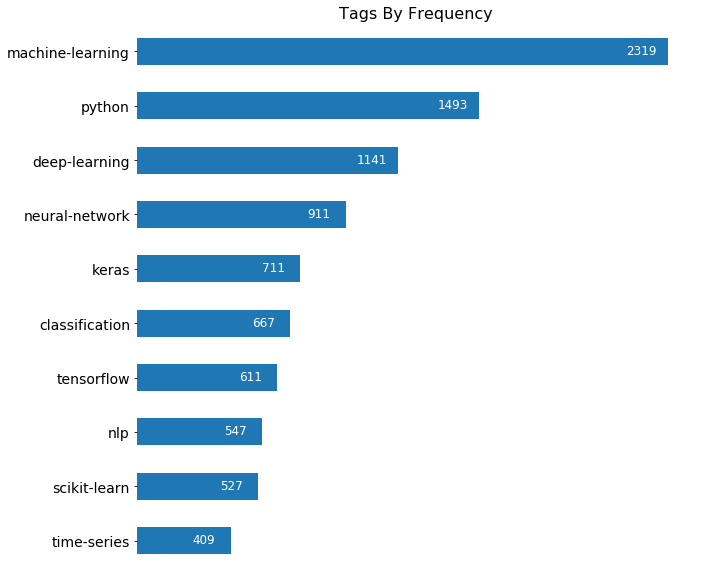

In [165]:
y_axis_values = tags_pt.sort_values(by='Number of Appearances', ascending=False).head(10).index[::-1]
x_axis_values = tags_pt.sort_values(by='Number of Appearances', ascending=False).head(10)['Number of Appearances'][::-1]
title = 'Tags By Frequency'

barplot(x_axis_values, y_axis_values, title)

View top 10 tags by total views after Dec 31, 2019

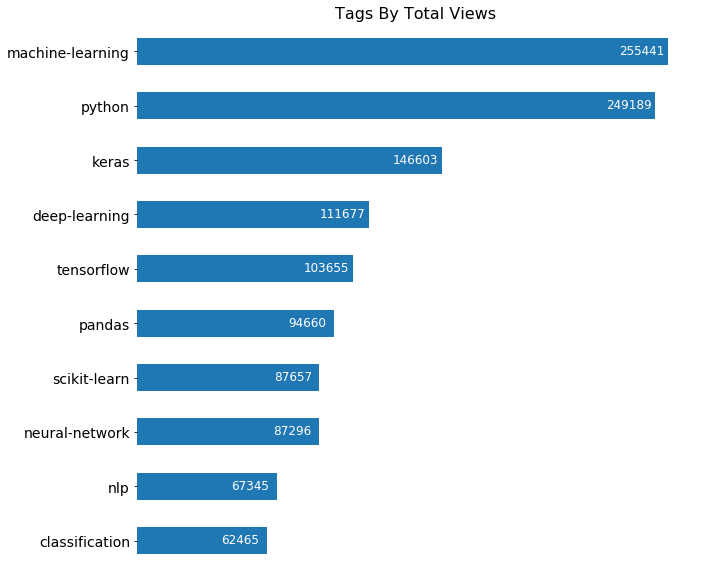

In [166]:
y_axis_values = tags_pt.sort_values(by='Sum of Views', ascending=False).head(10).index[::-1]
x_axis_values = tags_pt.sort_values(by='Sum of Views', ascending=False).head(10)['Sum of Views'][::-1]
title = 'Tags By Total Views'

barplot(x_axis_values, y_axis_values, title)

View top 10 tags by combined score

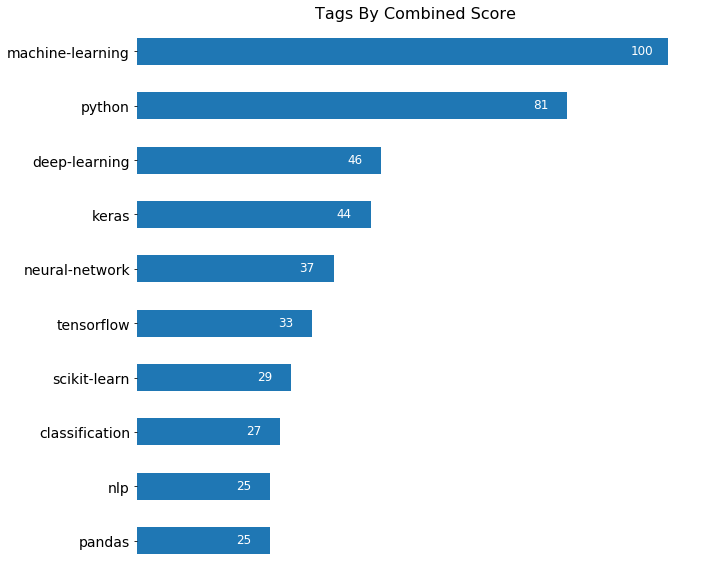

In [167]:
y_axis_values = tags_pt.sort_values(by='Score', ascending=False).head(10).index[::-1]
x_axis_values = tags_pt.sort_values(by='Score', ascending=False).head(10)['Score'][::-1]
title = 'Tags By Combined Score'

barplot(x_axis_values, y_axis_values, title)

## 7

## 8

## 9

## 10

## 11

## 12

## 13

## 14

## 15